# Converts the json file into a dataframe.

In [1]:
# to read the data
import os
import json
import gzip

from urllib.request import urlopen

# dataframe and series 
import pandas as pd
import numpy as np

In [2]:

from nltk.corpus import stopwords

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [5]:
# getting data from json.gz file

df_data = []
with gzip.open('Kindle_Store_5.json.gz') as data:
    for i in data:
        df_data.append(json.loads(i.strip()))
        

In [6]:
# to see the length of the data, it means total number of reviews also
print(len(df_data))

# to see the first row of the list
print(df_data[0])

2222983
{'overall': 4.0, 'verified': True, 'reviewTime': '07 3, 2014', 'reviewerID': 'A2LSKD2H9U8N0J', 'asin': 'B000FA5KK0', 'style': {'Format:': ' Kindle Edition'}, 'reviewerName': 'sandra sue marsolek', 'reviewText': 'pretty good story, a little exaggerated, but I liked it pretty well.  liked the characters, the plot..it had mystery, action, love, all of the main things. I think most western lovers would injoy this book', 'summary': 'pretty good story', 'unixReviewTime': 1404345600}


In [7]:
df = pd.DataFrame.from_dict(df_data)

In [8]:
df.to_csv('kindle_data.csv', index = False)

## Getting Meta Data to Get More Information About Products


In [9]:
data_meta = []
with gzip.open('meta_Kindle_Store.json.gz') as d:
    for i in d:
        data_meta.append(json.loads(i.strip()))

In [10]:
print(len(data_meta))

print(data_meta[0])

491670
{'category': ['Kindle Store', 'Kindle eBooks', 'Science Fiction & Fantasy'], 'tech1': '', 'description': [], 'fit': '', 'title': '', 'also_buy': ['B007NLCJBC', 'B01FARODH8'], 'tech2': '', 'brand': 'Arthur K. Barnes', 'feature': [], 'rank': '1,716,849 Paid in Kindle Store (', 'also_view': ['B000FBF81K', 'B00PBDMER8'], 'details': {'File Size:': '295 KB', 'Print Length:': '113 pages', 'Publisher:': 'FuturesPast Editions (October 14, 2001)', 'Publication Date:': 'October 14, 2001', 'Language:': 'English', 'ASIN:': 'B000FA5KKA', 'Word Wise:': 'Enabled', 'Lending:': 'Enabled'}, 'main_cat': 'Buy a Kindle', 'similar_item': '', 'date': '', 'price': '', 'asin': 'B000FA5KKA', 'imageURL': [], 'imageURLHighRes': []}


In [11]:
df_meta = pd.DataFrame.from_dict(data_meta)

In [12]:
df_meta.to_csv('kindle_meta_last.csv', index = False)

# Sentiment Analysis of the reviews

In [4]:
import pandas as pd
import numpy as np


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split


# from mlxtend.evaluate import confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix
# from mlxtend.plotting import plot_decision_regions


from sklearn.metrics import confusion_matrix

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import nltk
from nltk.corpus import stopwords



In [5]:
df = pd.read_csv('kindle_data.csv', low_memory=False) #getting main data


In [6]:
df_meta = pd.read_csv('kindle_meta_last.csv', low_memory=False) #getting metadata for title names


In [7]:
df_meta.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"['Kindle Store', 'Kindle eBooks', 'Science Fic...",NaN,[],NaN,NaN,"['B007NLCJBC', 'B01FARODH8']",NaN,Arthur K. Barnes,[],"1,716,849 Paid in Kindle Store (","['B000FBF81K', 'B00PBDMER8']","{'File Size:': '295 KB', 'Print Length:': '113...",Buy a Kindle,NaN,NaN,NaN,B000FA5KKA,[],[]
1,"['Kindle Store', 'Kindle eBooks', 'Engineering...",NaN,[],NaN,NaN,"['B00AYWTHZS', 'B071CTK28D']",NaN,Visit Amazon's Paul A. Craig Page,[],"1,683,973 Paid in Kindle Store (",['B00AYWTHZS'],"{'File Size:': '1648 KB', 'Print Length:': '26...",Buy a Kindle,NaN,NaN,NaN,B000FA5M3K,[],[]
2,"['Kindle Store', 'Kindle eBooks', 'Biographies...",NaN,[],NaN,NaN,[],NaN,Jean Marie Stine,[],"3,394,136 Paid in Kindle Store (",[],"{'File Size:': '262 KB', 'Print Length:': '103...",Buy a Kindle,NaN,NaN,NaN,B000FA5KJQ,[],[]
3,"['Kindle Store', 'Kindle eBooks', 'Science Fic...",NaN,[],NaN,NaN,[],NaN,Arthur K. Barnes,[],"1,884,541 Paid in Kindle Store (",[],"{'File Size:': '251 KB', 'Print Length:': '116...",Buy a Kindle,NaN,NaN,NaN,B000FA5NSO,[],[]
4,"['Kindle Store', 'Kindle eBooks', 'Business & ...",NaN,[],NaN,NaN,"['B000SEGKF2', 'B004774LR0', 'B018LE1KUK', 'B0...",NaN,Visit Amazon's Ethan M. Rasiel Page,[],"72,075 Paid in Kindle Store (","['B018LE1KUK', 'B000SEGKF2', 'B007XWFZSA', 'B0...","{'File Size:': '953 KB', 'Print Length:': '187...",Buy a Kindle,NaN,NaN,NaN,B000FA5KX2,[],[]


In [8]:
df.head() #first look to df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN
1,5.0,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN
2,5.0,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN
3,5.0,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN
4,5.0,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2,NaN


In [9]:
df = pd.merge(df,df_meta[['title','asin']],on=['asin'], how='left') 

In [10]:
df.head(100)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,title
0,4.0,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN,NaN
1,5.0,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN,NaN
2,5.0,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN,NaN
3,5.0,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN,NaN
4,5.0,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.0,True,"12 10, 2014",A1FNYG3FV6YK3F,B000FBFMHU,NaN,William Amerman,Well written. Fast-paced. I had seen the movie...,Good book,1418169600,NaN,NaN,NaN
96,4.0,True,"12 9, 2014",A22XXUW6YK66HQ,B000FBFMHU,NaN,Gail J. Pattison,"This was almost as good as the movie, and fun ...",Fun Read,1418083200,NaN,NaN,NaN
97,4.0,True,"12 2, 2014",A3QDVJB368T5SV,B000FBFMHU,NaN,Natalie Jean Brown,I had seen the movie and loved it. The book h...,very Entertaining!,1417478400,NaN,NaN,NaN
98,5.0,True,"10 14, 2014",A37JQG6PIML61Q,B000FBFMHU,NaN,Jaki,Great learning experience. I was most shocked...,Now I need to see the movie.,1413244800,NaN,NaN,NaN


In [11]:
df.shape

(2222983, 13)

In [12]:
df.isna().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style               52617
reviewerName          142
reviewText            410
summary              1757
unixReviewTime          0
vote              1931032
image             2221618
title               14793
dtype: int64

In [13]:
df.dropna(subset = ['reviewText'], inplace = True)

In [14]:
df.isna().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style               52600
reviewerName          142
reviewText              0
summary              1735
unixReviewTime          0
vote              1930627
image             2221213
title               14782
dtype: int64

# Column Observation

In [15]:
df.info(verbose=True, null_counts=True)

/tmp/ipykernel_14384/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2222573 entries, 0 to 2222982
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         2222573 non-null  float64
 1   verified        2222573 non-null  bool   
 2   reviewTime      2222573 non-null  object 
 3   reviewerID      2222573 non-null  object 
 4   asin            2222573 non-null  object 
 5   style           2169973 non-null  object 
 6   reviewerName    2222431 non-null  object 
 7   reviewText      2222573 non-null  object 
 8   summary         2220838 non-null  object 
 9   unixReviewTime  2222573 non-null  int64  
 10  vote            291946 non-null   object 
 11  image           1360 non-null     object 
 12  title           2207791 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 222.6+ MB


In [16]:

df['overall'].value_counts() 

5.0    1353344
4.0     556256
3.0     197919
2.0      66888
1.0      48166
Name: overall, dtype: int64

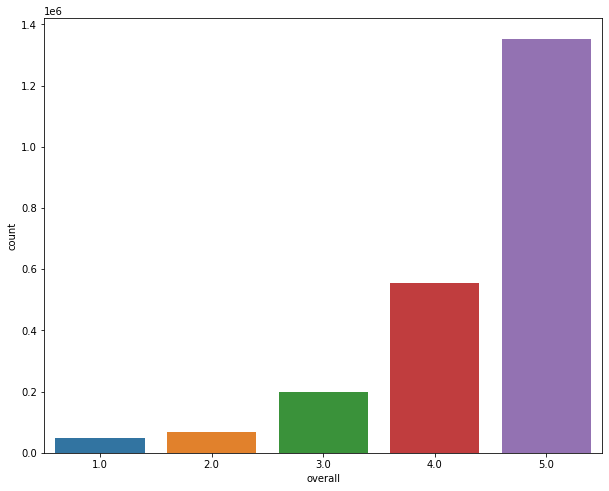

In [17]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='overall', data=df)

In [18]:
df['verified'].value_counts()

True     1417690
False     804883
Name: verified, dtype: int64

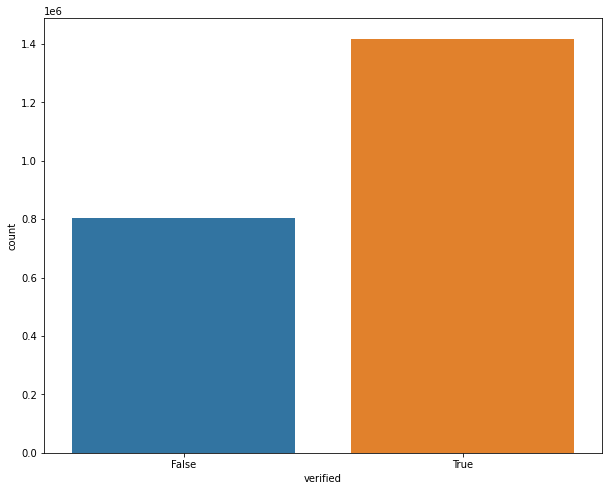

In [19]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='verified', data=df)

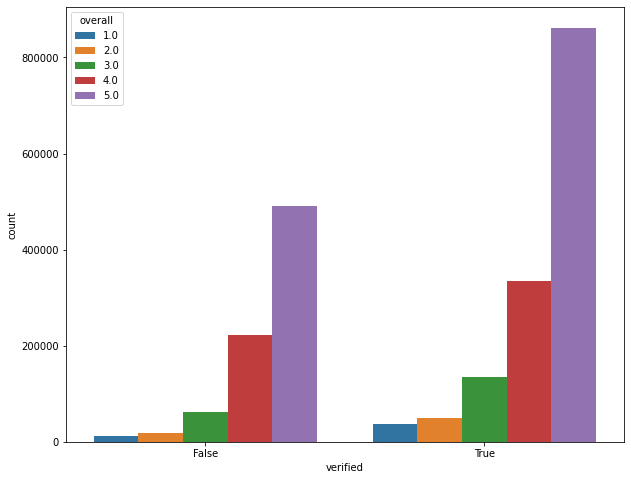

In [20]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='verified', hue="overall", data=df)

Converts reviewTime to Day month year

In [21]:
df['reviewTime'].nunique()

4838

In [22]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [23]:
df['day'] =df['reviewTime'].dt.day
df['month'] =df['reviewTime'].dt.month 
df['year'] =df['reviewTime'].dt.year

Year Counts

In [24]:
df['year'].value_counts()

2015    615680
2016    524890
2014    486926
2013    247913
2017    185370
2018     75655
2012     63467
2011     16685
2010      2583
2009       914
2008       857
2007       410
2005       283
2006       281
2004       178
2003       160
2002       113
2001        97
2000        94
1999        14
1998         2
1997         1
Name: year, dtype: int64

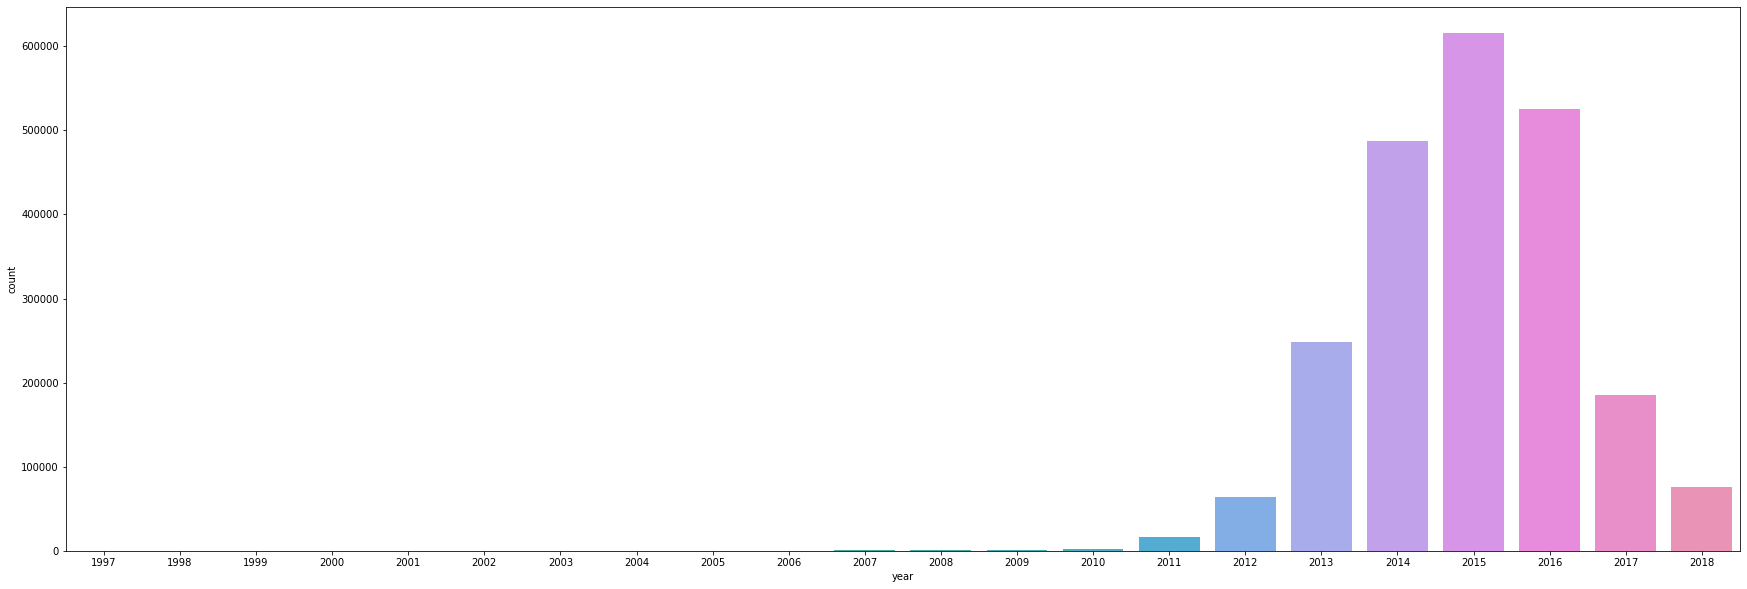

In [25]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='year', data=df)

Month count

In [26]:
df['month'].value_counts()

3     205772
1     200076
5     197691
4     193928
6     192535
7     183858
8     180840
2     180755
12    174977
11    171548
10    171075
9     169518
Name: month, dtype: int64

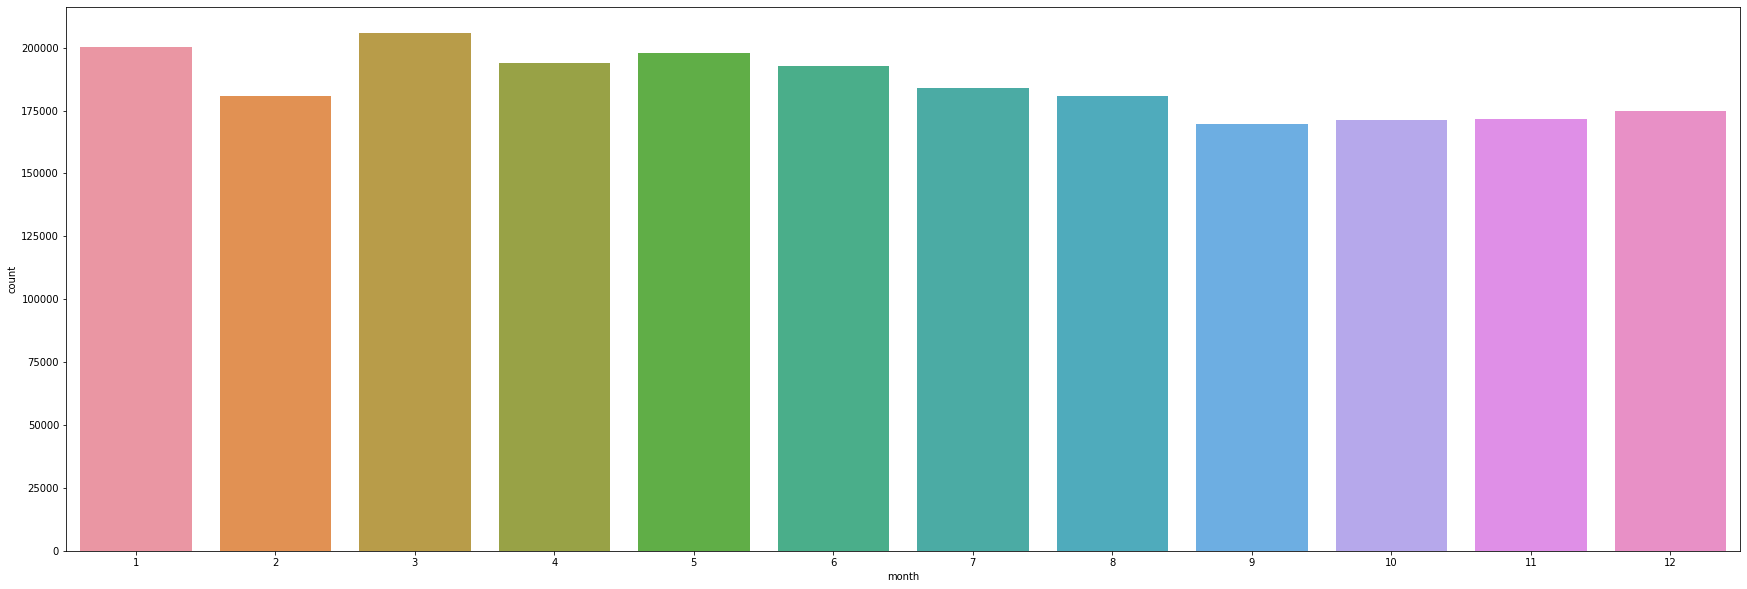

In [27]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='month',data=df)

In [28]:
df.groupby('month')['overall'].mean()

month
1     4.394415
2     4.397682
3     4.405575
4     4.397560
5     4.400195
6     4.396328
7     4.382431
8     4.378887
9     4.385304
10    4.398439
11    4.406213
12    4.390817
Name: overall, dtype: float64

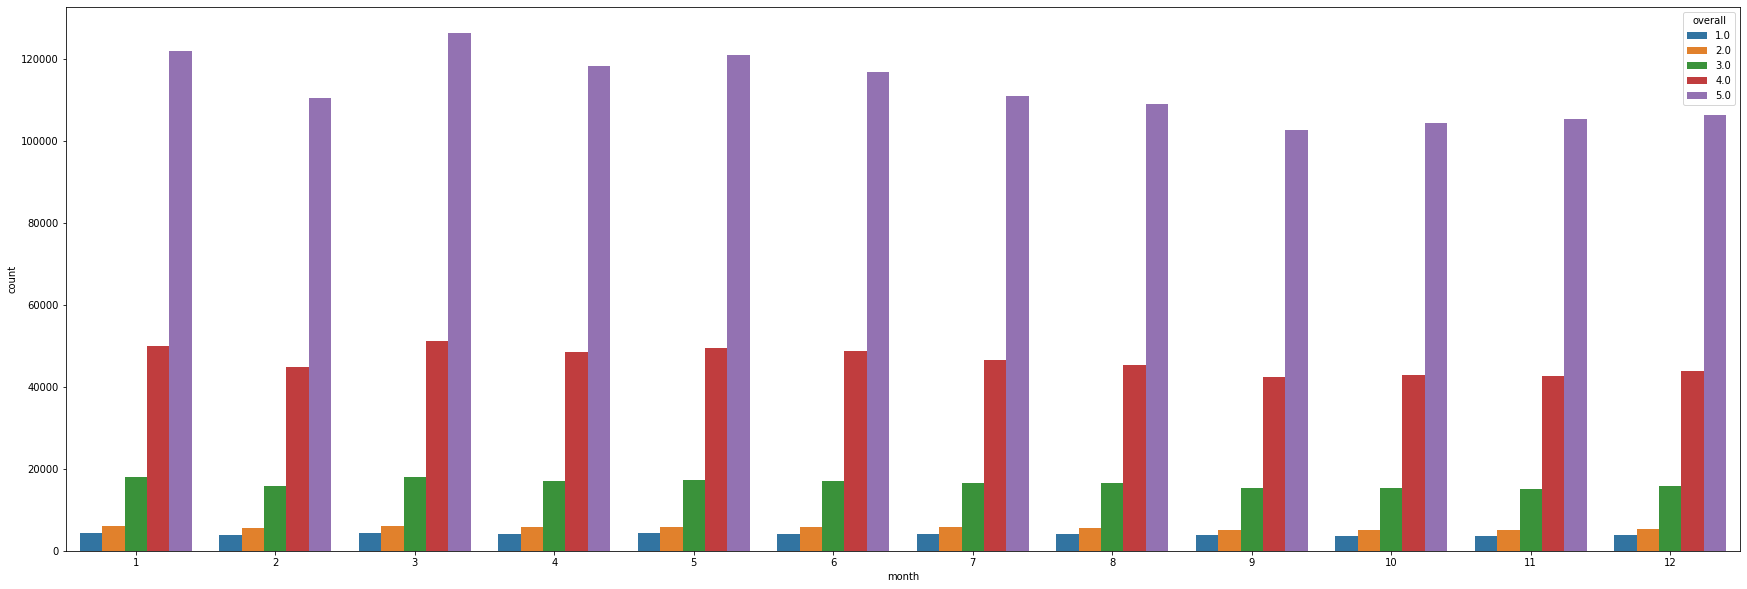

In [29]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='month', hue="overall", data=df)

Days rating distribution

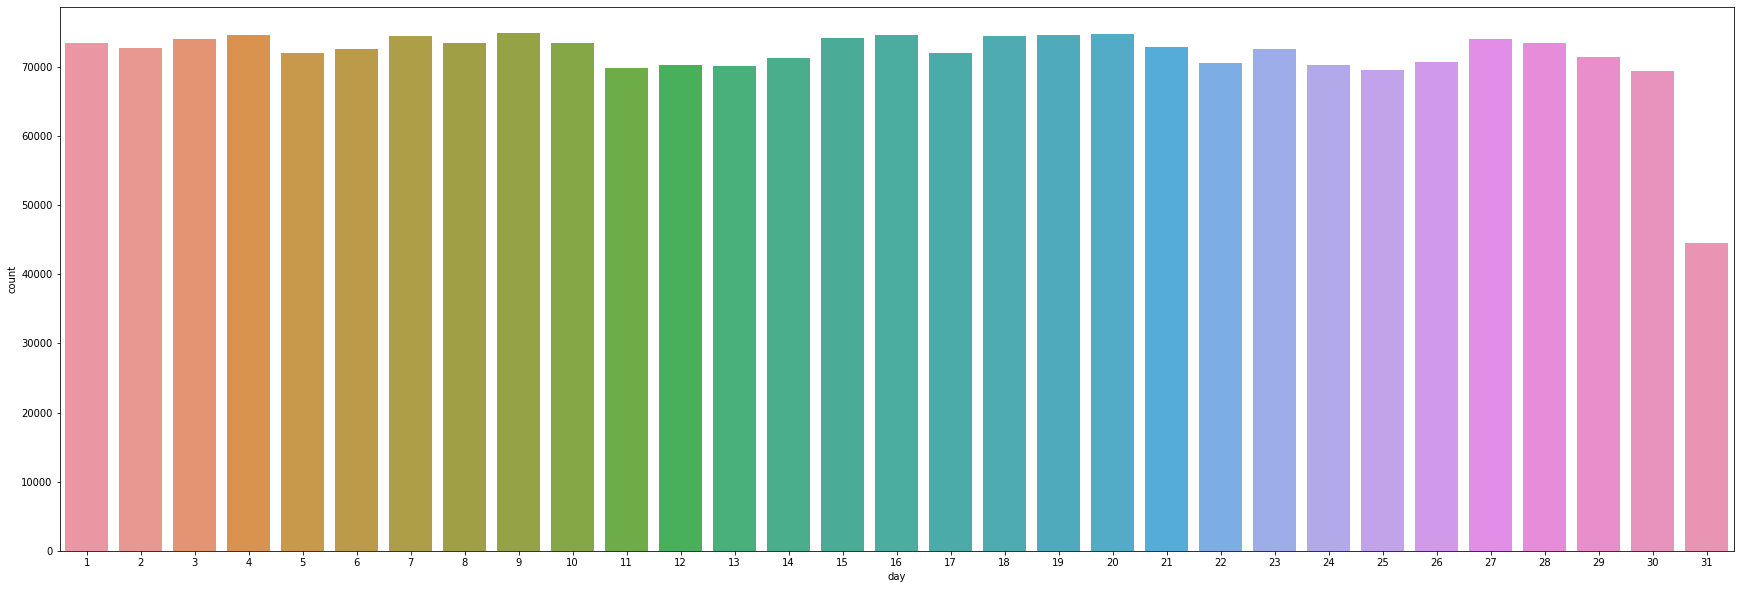

In [30]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='day',data=df)

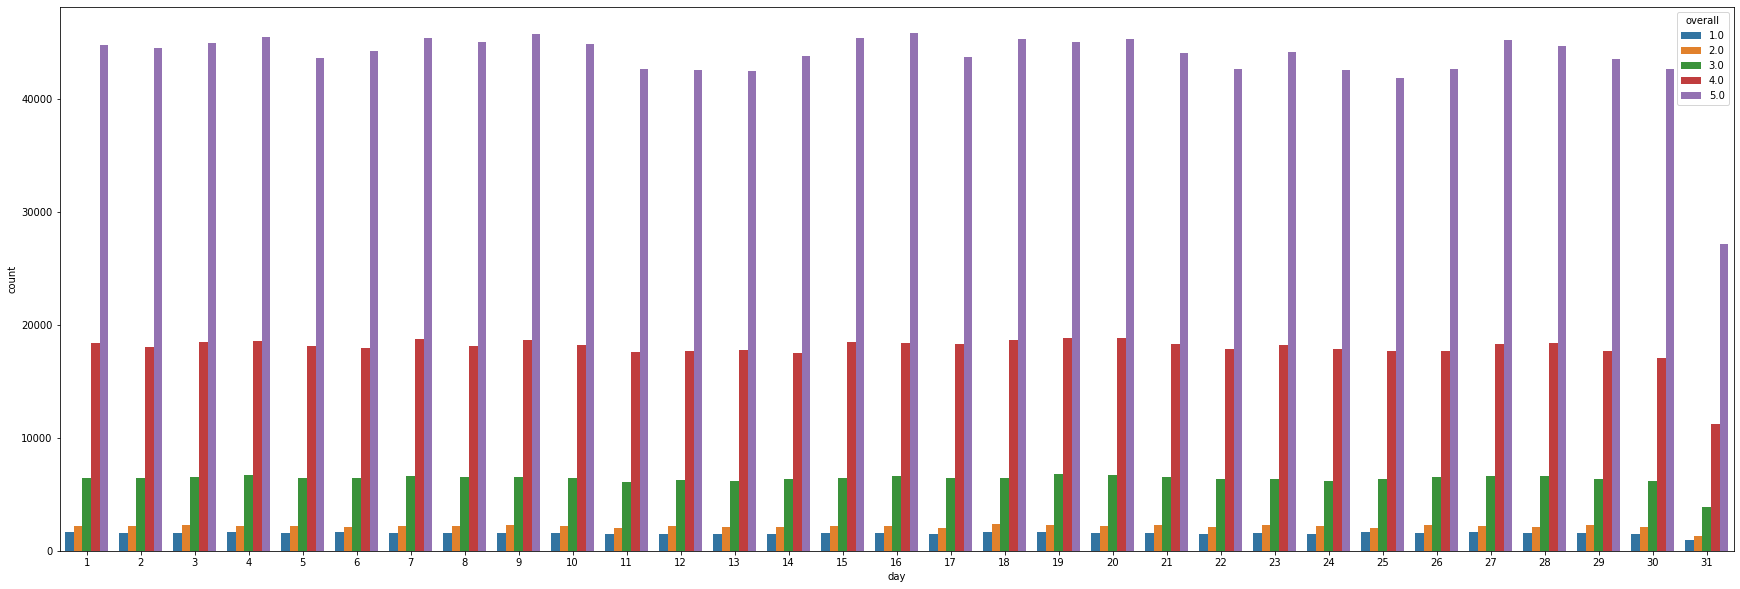

In [31]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='day', hue="overall", data=df)

Reviewers Observations

In [32]:
df['reviewerID'].nunique()

139815

In [33]:
df['reviewerName'].nunique()

102635

In [34]:
df.drop(columns=['reviewerName'],inplace=True)

In [35]:
df.groupby('reviewerID')['overall'].mean().sort_values(ascending=False).head(100)

reviewerID
A2D74TPKWKWEK3    5.0
A2B4I62UV950YH    5.0
A2B3YIIX946QS0    5.0
A2B419GKSXK3HX    5.0
AHKZ0UEEV4SJ6     5.0
                 ... 
AHNJEJDXA1KB8     5.0
A2AVFVMYZ9XT5G    5.0
A2AVW7SB87AW4D    5.0
A2AUIYOGVS02LQ    5.0
A2AVYK91IR5T53    5.0
Name: overall, Length: 100, dtype: float64

In [36]:
df.groupby('reviewerID')['asin'].count().sort_values(ascending=False).head(100)

reviewerID
A1JLU5H1CCENWX    1377
A328S9RN3U5M68    1234
A13QTZ8CIMHHG4    1011
A3GWE80SUGORJD    1007
A2YJ8VP1SSHJ7      931
                  ... 
A3Q9ZYNO1MXQDW     432
A2S5EPJ451WL3I     431
A2UQGX6YMQ5BAL     427
AW7JJRAMYZY1X      425
A1EZ9Z9UF4EVMG     425
Name: asin, Length: 100, dtype: int64

In [37]:
df.loc[df['reviewerID']=='A1JLU5H1CCENWX'].groupby('overall')['asin'].count()

overall
3.0       7
4.0      75
5.0    1295
Name: asin, dtype: int64

In [38]:
df.loc[df['reviewerID']=='A328S9RN3U5M68'].groupby('overall')['asin'].count()

overall
3.0     13
4.0    248
5.0    973
Name: asin, dtype: int64

In [39]:
df.loc[df['reviewerID']=='A13QTZ8CIMHHG4'].groupby('overall')['asin'].count()

overall
2.0      9
3.0    282
4.0    490
5.0    230
Name: asin, dtype: int64

Total number of rating of each book

In [40]:
df.groupby('asin')['overall'].mean().sort_values(ascending=False).head(10)

asin
B00GO942QO    5.0
B0090R7BRO    5.0
B00ER8ECL4    5.0
B00JYFN72A    5.0
B00OQPOOZM    5.0
B00EREDDTA    5.0
B011CX8DO8    5.0
B00CCSUJXG    5.0
B01AVT7188    5.0
B01AVTFXP6    5.0
Name: overall, dtype: float64

In [41]:
df['asin'].value_counts().head(10)

B00YN6XHMU    2217
B00C2WDD5I    1461
B00ESJ3S94    1327
B015BIHKH6    1249
B00IJYII4E     808
B00EV9LSJI     772
B00ABLJ5X6     762
B0142IHZPI     761
B00WGXCP1G     744
B004KKY782     720
Name: asin, dtype: int64

In [42]:
df.loc[df['asin']=='B0176NQRQE'].groupby('overall').count()

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,vote,image,title,day,month,year
overall,,,,,,,,,,,,,,
5.0,8,8,8,8,8,8,8,8,1,0,8,8,8,8


In [43]:
df.loc[df['asin']=='B00YN6XHMU'].groupby('overall').count()

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,vote,image,title,day,month,year
overall,,,,,,,,,,,,,,
1.0,94,94,94,94,94,94,94,94,44,0,94,94,94,94
2.0,97,97,97,97,97,97,97,97,16,0,97,97,97,97
3.0,222,222,222,222,222,222,222,222,23,0,222,222,222,222
4.0,355,355,355,355,355,355,354,355,24,0,355,355,355,355
5.0,1449,1449,1449,1449,1448,1449,1448,1449,158,5,1449,1449,1449,1449


In [44]:
df.loc[df['asin']=='B00YN6XHMU'].groupby('title').mean()

,overall,verified,unixReviewTime,day,month,year
title,,,,,,
Grey: Fifty Shades of Grey as told,4.338746,0.878214,1.443439e+09,17.377988,6.85115,2015.211096


In [45]:
df.loc[df['asin']=='B00C2WDD5I'].groupby('title').mean()

,overall,verified,unixReviewTime,day,month,year
title,,,,,,
"The Atlantis Gene: A Thriller (The Origin Mystery, Book 1) - Kindle edition",4.138946,0.616701,1.421145e+09,15.7577,6.239562,2014.558522


In [46]:
df.loc[df['asin']=='B00ESJ3S94'].groupby('title').mean()

,overall,verified,unixReviewTime,day,month,year
title,,,,,,
Fueled (The Driven Series Book 2) - Kindle edition,4.831198,0.836473,1.398161e+09,15.208742,7.055765,2013.763376


In [47]:
df.loc[df['asin']=='B015BIHKH6'].groupby('title').mean()

,overall,verified,unixReviewTime,day,month,year
title,,,,,,
Sense And Sensibility (Annotated,4.352282,0.579664,1.360393e+09,15.864692,6.180945,2012.63811


In [48]:
df.loc[df['asin']=='B00IJYII4E'].groupby('title').mean()

,overall,verified,unixReviewTime,day,month,year
title,,,,,,
"The Girl in the Box Series, Books 1-3: Alone, Untouched and Soulless - Kindle edition",4.40099,0.983911,1.436409e+09,15.887376,6.405941,2015.028465


In [49]:
df.loc[df['asin']=='B00EV9LSJI'].groupby('title').mean()

,overall,verified,unixReviewTime,day,month,year
title,,,,,,
Tears of Tess (Monsters in the Dark Book 1) - Kindle edition,4.567358,0.743523,1.417163e+09,15.396373,6.335492,2014.42487


In [50]:
df.loc[df['asin']=='B00ABLJ5X6'].groupby('title').mean()

,overall,verified,unixReviewTime,day,month,year
title,,,,,,
Takedown Twenty: A laugh-out-loud crime adventure full of high-stakes suspense (Stephanie Plum Book 20) - Kindle edition,4.165354,0.753281,1.403492e+09,16.459318,6.577428,2013.968504


In [51]:
df.loc[df['asin']=='B0142IHZPI'].groupby('title').mean()

,overall,verified,unixReviewTime,day,month,year
title,,,,,,
When I&#39;m Gone: A Novel - Kindle edition,4.500657,0.264126,1.483588e+09,15.655716,6.471748,2016.51774


In [52]:
df.loc[df['asin']=='B00WGXCP1G'].groupby('title').mean()

,overall,verified,unixReviewTime,day,month,year
title,,,,,,
Dipping Into Sin (a BWWM Alpha Male Romance) - Kindle edition,4.229839,0.478495,1.441474e+09,15.520161,6.50672,2015.182796


In [53]:
df.loc[df['asin']=='B004KKY782'].groupby('title').mean()

,overall,verified,unixReviewTime,day,month,year
title,,,,,,
The Color of Heaven (The Color of Heaven Series Book 1) - Kindle edition,4.501389,0.947222,1.428171e+09,15.661111,6.047222,2014.797222


In [54]:
df_books = pd.DataFrame(columns=["Book", "Rating #",'Rating Avg.'])

In [55]:
df_books = df_books.append({     
     "Book": 'Fifty Shades of Grey' ,
      "Rating #": 2217 , 
       'Rating Avg.' : 4.34}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'The Atlantis Gene:(Book 1)' ,
      "Rating #": 1461 , 
       'Rating Avg.' : 4.14}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'Fueled (Book 2)' ,
      "Rating #": 1327 , 
       'Rating Avg.' : 4.83}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'Sense And Sensibility' ,
      "Rating #": 1249 , 
       'Rating Avg.' : 4.35}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'The Girl in the Box, Books 1-3' ,
      "Rating #": 808 , 
       'Rating Avg.' : 4.40}, ignore_index=True)

df_books = df_books.append({     
     "Book": 'Tears of Tess (Book 1)' ,
      "Rating #": 772 , 
       'Rating Avg.' : 4.57}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'Takedown Twenty' ,
      "Rating #": 762 , 
       'Rating Avg.' : 4.17}, ignore_index=True)
df_books = df_books.append({     
     "Book": "When I'm Gone" ,
      "Rating #": 761 , 
       'Rating Avg.' : 4.50}, ignore_index=True)
df_books = df_books.append({     
     "Book": "Dipping Into Sin" ,
      "Rating #": 744 , 
       'Rating Avg.' : 4.23}, ignore_index=True)
df_books = df_books.append({     
     "Book": "The Color of Heaven(Book 1)" ,
      "Rating #": 720 , 
       'Rating Avg.' : 4.50}, ignore_index=True)

/tmp/ipykernel_14384/473078913.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_books = df_books.append({
/tmp/ipykernel_14384/473078913.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_books = df_books.append({
/tmp/ipykernel_14384/473078913.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_books = df_books.append({
/tmp/ipykernel_14384/473078913.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_books = df_books.append({
/tmp/ipykernel_14384/473078913.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_books = df_books.ap

In [56]:
df_books

,Book,Rating #,Rating Avg.
0,Fifty Shades of Grey,2217,4.34
1,The Atlantis Gene:(Book 1),1461,4.14
2,Fueled (Book 2),1327,4.83
3,Sense And Sensibility,1249,4.35
4,"The Girl in the Box, Books 1-3",808,4.40
5,Tears of Tess (Book 1),772,4.57
6,Takedown Twenty,762,4.17
7,When I'm Gone,761,4.50
8,Dipping Into Sin,744,4.23
9,The Color of Heaven(Book 1),720,4.50


[Text(0, 0, 'Fifty Shades of Grey'),
 Text(1, 0, 'The Atlantis Gene:(Book 1)'),
 Text(2, 0, 'Fueled (Book 2)'),
 Text(3, 0, 'Sense And Sensibility'),
 Text(4, 0, 'The Girl in the Box, Books 1-3'),
 Text(5, 0, 'Tears of Tess (Book 1)'),
 Text(6, 0, 'Takedown Twenty'),
 Text(7, 0, "When I'm Gone"),
 Text(8, 0, 'Dipping Into Sin'),
 Text(9, 0, 'The Color of Heaven(Book 1)')]

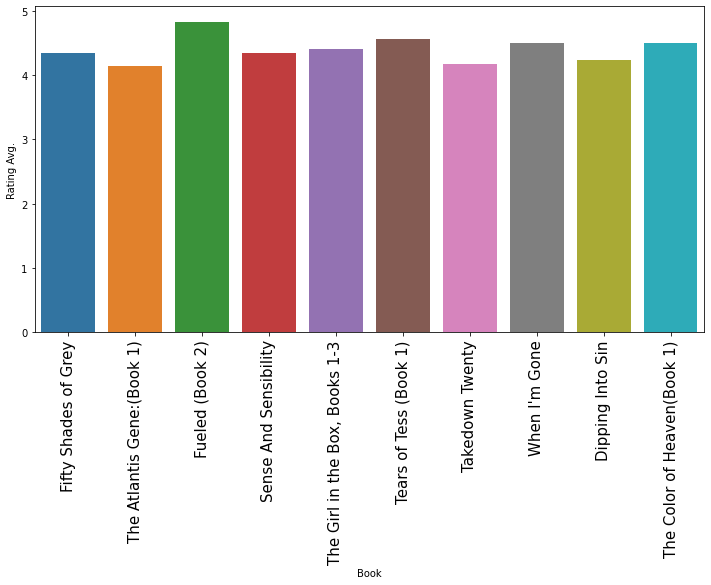

In [57]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Book', y="Rating Avg.",data=df_books)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,size=15)

[Text(0, 0, 'Fifty Shades of Grey'),
 Text(1, 0, 'The Atlantis Gene:(Book 1)'),
 Text(2, 0, 'Fueled (Book 2)'),
 Text(3, 0, 'Sense And Sensibility'),
 Text(4, 0, 'The Girl in the Box, Books 1-3'),
 Text(5, 0, 'Tears of Tess (Book 1)'),
 Text(6, 0, 'Takedown Twenty'),
 Text(7, 0, "When I'm Gone"),
 Text(8, 0, 'Dipping Into Sin'),
 Text(9, 0, 'The Color of Heaven(Book 1)')]

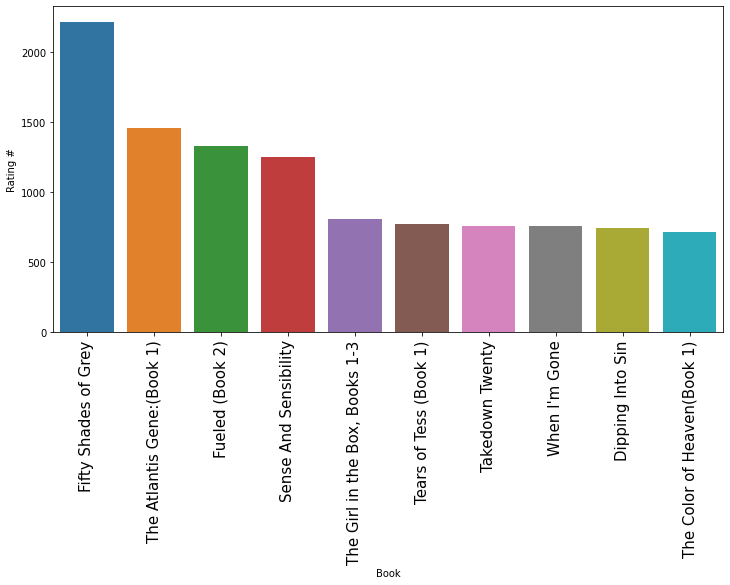

In [58]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Book', y="Rating #",data=df_books)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,size=15)

Title Observations

In [59]:
df['title'].value_counts().head(10)

Grey: Fifty Shades of Grey as told                                                       2217
Claimed                                                                                  2014
Death                                                                                    1468
The Atlantis Gene: A Thriller (The Origin Mystery, Book 1) - Kindle edition              1461
Fueled (The Driven Series Book 2) - Kindle edition                                       1327
Sense And Sensibility (Annotated                                                         1249
Taken                                                                                    1199
Bound                                                                                     843
The Girl in the Box Series, Books 1-3: Alone, Untouched and Soulless - Kindle edition     808
Tempted                                                                                   784
Name: title, dtype: int64

In [60]:
df['style'].value_counts()


{'Format:': ' Kindle Edition'}                     2140965
{'Format:': ' Paperback'}                            15887
{'Format:': ' Hardcover'}                             7342
{'Format:': ' Audible Audiobook'}                     2940
{'Format:': ' Mass Market Paperback'}                 2353
{'Format:': ' Audio CD'}                               193
{'Format:': ' Kindle Edition with Audio/Video'}         79
{'Format:': ' MP3 CD'}                                  46
{'Format:': ' Print Magazine'}                          40
{'Format:': ' Board book'}                              31
{'Format:': ' Leather Bound'}                           29
{'Format:': ' Audio Cassette'}                          14
{'Format:': ' Perfect Paperback'}                       13
{'Format:': ' Flexibound'}                               8
{'Format:': ' School & Library Binding'}                 6
{'Format:': ' DVD'}                                      6
{'Format:': ' Library Binding'}                         

In [61]:
df = df.loc[df['style'] == "{'Format:': ' Kindle Edition'}"] # taking only Kindle edition versions


In [62]:
df['summary'].nunique()


1209555

In [63]:
df['summary'][0]


'pretty good story'

In [64]:
df['reviewText'][0]


'pretty good story, a little exaggerated, but I liked it pretty well.  liked the characters, the plot..it had mystery, action, love, all of the main things. I think most western lovers would injoy this book'

In [65]:
df['vote'].value_counts().head()


2    126672
3     54121
4     28917
5     17341
6     11148
Name: vote, dtype: int64

In [66]:
df['image'].value_counts().head()


['https://images-na.ssl-images-amazon.com/images/I/51-Fi5BvzbL._SY88.jpg']    9
['https://images-na.ssl-images-amazon.com/images/I/61Rr6pfHbeL._SY88.jpg']    7
['https://images-na.ssl-images-amazon.com/images/I/71eN5U4UQoL._SY88.jpg']    7
['https://images-na.ssl-images-amazon.com/images/I/41JoJPMkZhL._SY88.jpg']    5
['https://images-na.ssl-images-amazon.com/images/I/01+nEU0JBaL._SY88.jpg']    5
Name: image, dtype: int64

In [67]:
df.drop(columns=['image','vote'],inplace=True) #droping columns


In [68]:
df.drop(columns=['unixReviewTime'],inplace=True) #droping columns


# Ratings to words

In [69]:
df['overall'] = df['overall'].apply(np.int64) #converting from float to integer for creating new columns


In [70]:
df.info(verbose=True, null_counts=True) #to see the # of columns


/tmp/ipykernel_14384/2984177421.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True) #to see the # of columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140965 entries, 0 to 2222982
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   overall     2140965 non-null  int64         
 1   verified    2140965 non-null  bool          
 2   reviewTime  2140965 non-null  datetime64[ns]
 3   reviewerID  2140965 non-null  object        
 4   asin        2140965 non-null  object        
 5   style       2140965 non-null  object        
 6   reviewText  2140965 non-null  object        
 7   summary     2139249 non-null  object        
 8   title       2129910 non-null  object        
 9   day         2140965 non-null  int64         
 10  month       2140965 non-null  int64         
 11  year        2140965 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(6)
memory usage: 198.1+ MB


In [71]:
def calc_sentiment_with_neutral(overall):
    '''encoding the sentiments of the ratings.'''
    if overall == 5 or overall == 4:
        return 2
    elif overall == 1 or overall == 2 : 
        return 0
    else:
        return 1

In [72]:
df['sentiment'] = df['overall'].apply(calc_sentiment_with_neutral) #applyind function


In [73]:
df.groupby(['sentiment','overall']).count()


verified  reviewTime  reviewerID     asin    style  \
sentiment overall                                                       
0         1           45639       45639       45639    45639    45639   
          2           63907       63907       63907    63907    63907   
1         3          189556      189556      189556   189556   189556   
2         4          535714      535714      535714   535714   535714   
          5         1306149     1306149     1306149  1306149  1306149   

                   reviewText  summary    title      day    month     year  
sentiment overall                                                           
0         1             45639    45618    45357    45639    45639    45639  
          2             63907    63877    63595    63907    63907    63907  
1         3            189556   189490   188571   189556   189556   189556  
2         4            535714   535460   532940   535714   535714   535714  
          5           1306149  1304804  1299447  1306149  1306149  1306149

In [74]:
df['sentiment'].value_counts() #number of new sentiments


2    1841863
1     189556
0     109546
Name: sentiment, dtype: int64

# Reviews Preprocessing

In [75]:
df['reviewText']=df['reviewText'].str.lower() # to make all letters lower


In [76]:
df['reviewText'] #check lower


0          pretty good story, a little exaggerated, but i...
1          if you've read other max brand westerns, you k...
2                               love max, always a fun twist
3                              as usual for him, a good book
4          mb is one of the original western writers and ...
                                 ...                        
2222978    ok book but some parts just didn't add up i fe...
2222979    kia i loved this book.  i am so glad that sky ...
2222980    this picks up where part one left off. secret ...
2222981    what a beautiful ending to such a twisted begi...
2222982    honey let me tell you ms. kia must have been r...
Name: reviewText, Length: 2140965, dtype: object

In [77]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
def remove_punctuation(text):
    '''this function splits the words to letters, remove punctuation and 
        again getting together letters as words '''
    text_no_punc = "".join([c for c in text if c not in string.punctuation])
    return text_no_punc

In [79]:
#removing punctions
df['review_clean'] = df['reviewText'].apply(lambda x: remove_punctuation(x))
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewText,summary,title,day,month,year,sentiment,review_clean
0,4,True,2014-07-03,A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},"pretty good story, a little exaggerated, but i...",pretty good story,NaN,3,7,2014,2,pretty good story a little exaggerated but i l...
1,5,True,2014-05-26,A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},"if you've read other max brand westerns, you k...",A very good book,NaN,26,5,2014,2,if youve read other max brand westerns you kno...
2,5,True,2016-09-16,A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},"love max, always a fun twist",Five Stars,NaN,16,9,2016,2,love max always a fun twist
3,5,True,2016-03-03,A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},"as usual for him, a good book",a good,NaN,3,3,2016,2,as usual for him a good book
4,5,True,2015-09-10,AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},mb is one of the original western writers and ...,A Western,NaN,10,9,2015,2,mb is one of the original western writers and ...


In [80]:
df['review_clean'][3]

'as usual for him a good book'

In [81]:
df['reviewText'][3]

'as usual for him, a good book'

In [82]:
df_pos = df.loc[df['sentiment']==2]

In [83]:
df_neg = df.loc[df['sentiment']==0]

In [84]:
df_notr = df.loc[df['sentiment']==1]

In [85]:
from wordcloud import WordCloud, STOPWORDS

In [86]:
stop_words = set(STOPWORDS)


In [87]:
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500,
                    max_font_size = 100, random_state = 42, width=800, height=400)


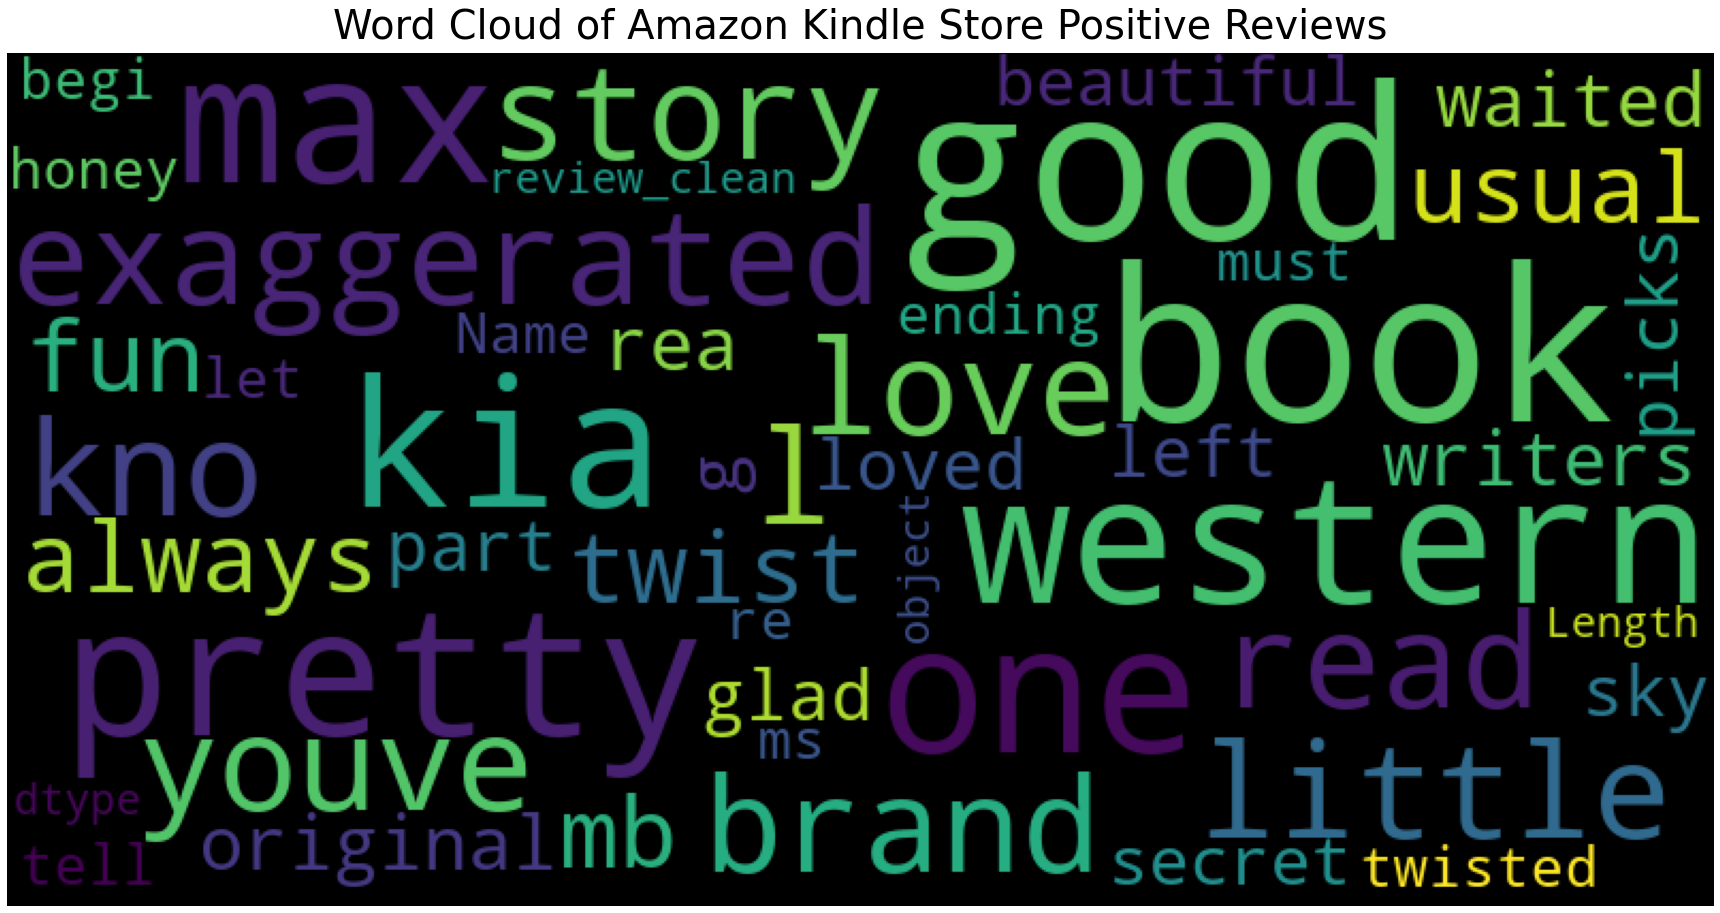

In [88]:
wordcloud.generate(str(df_pos['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Positive Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout() 

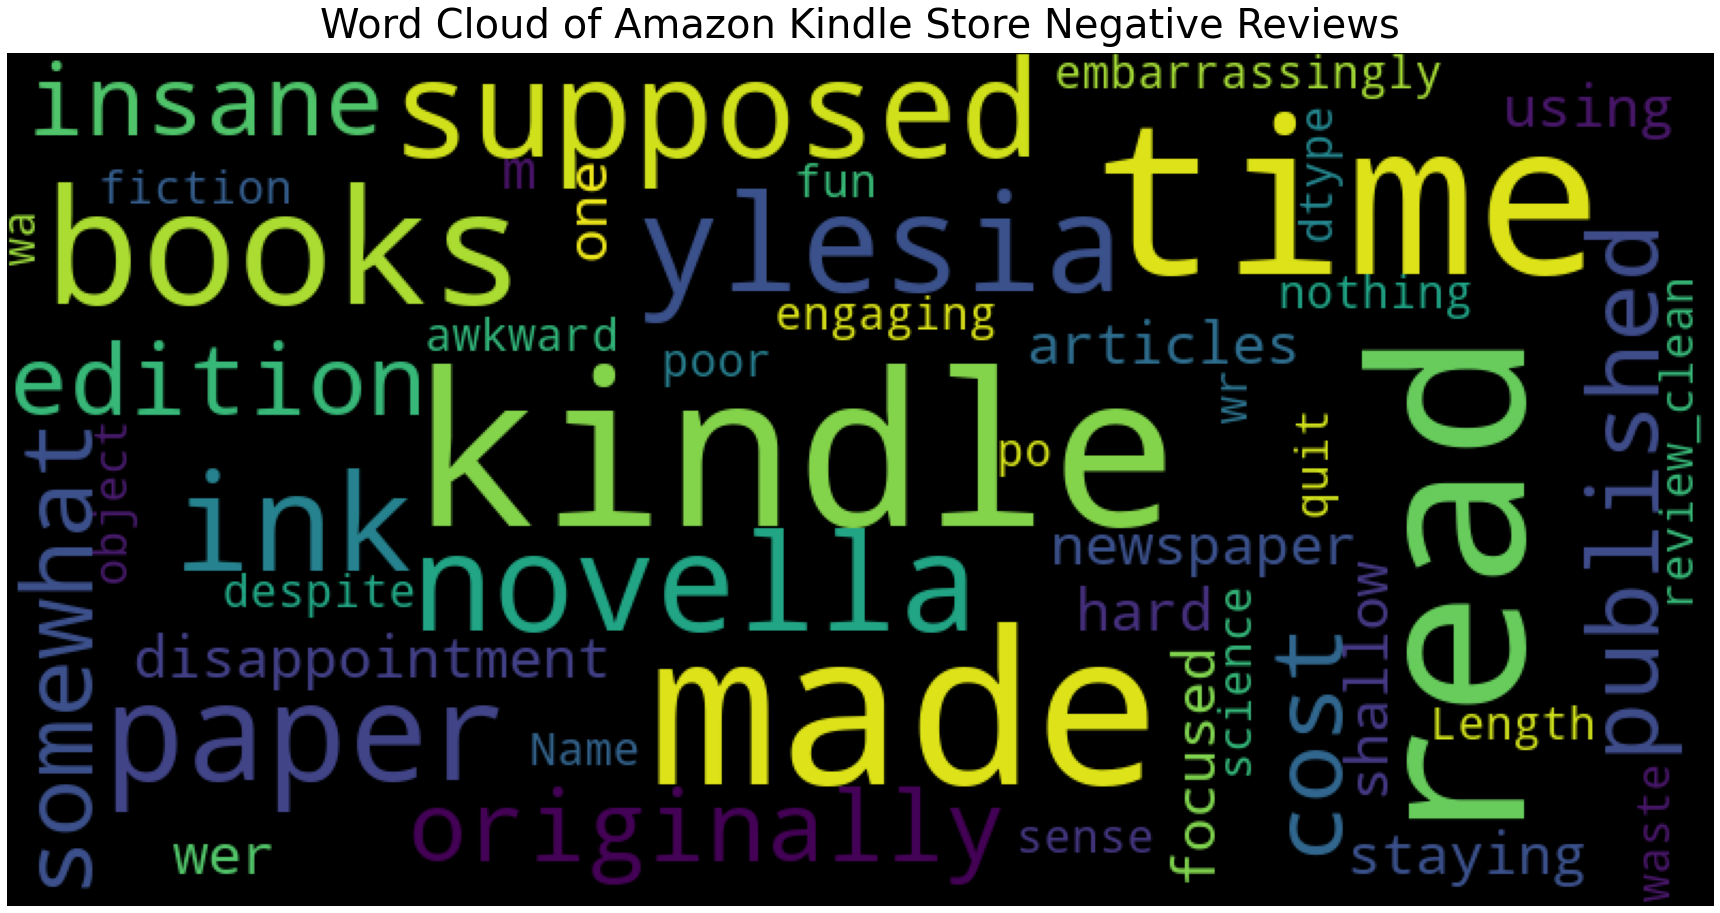

In [89]:
wordcloud.generate(str(df_neg['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Negative Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout() 

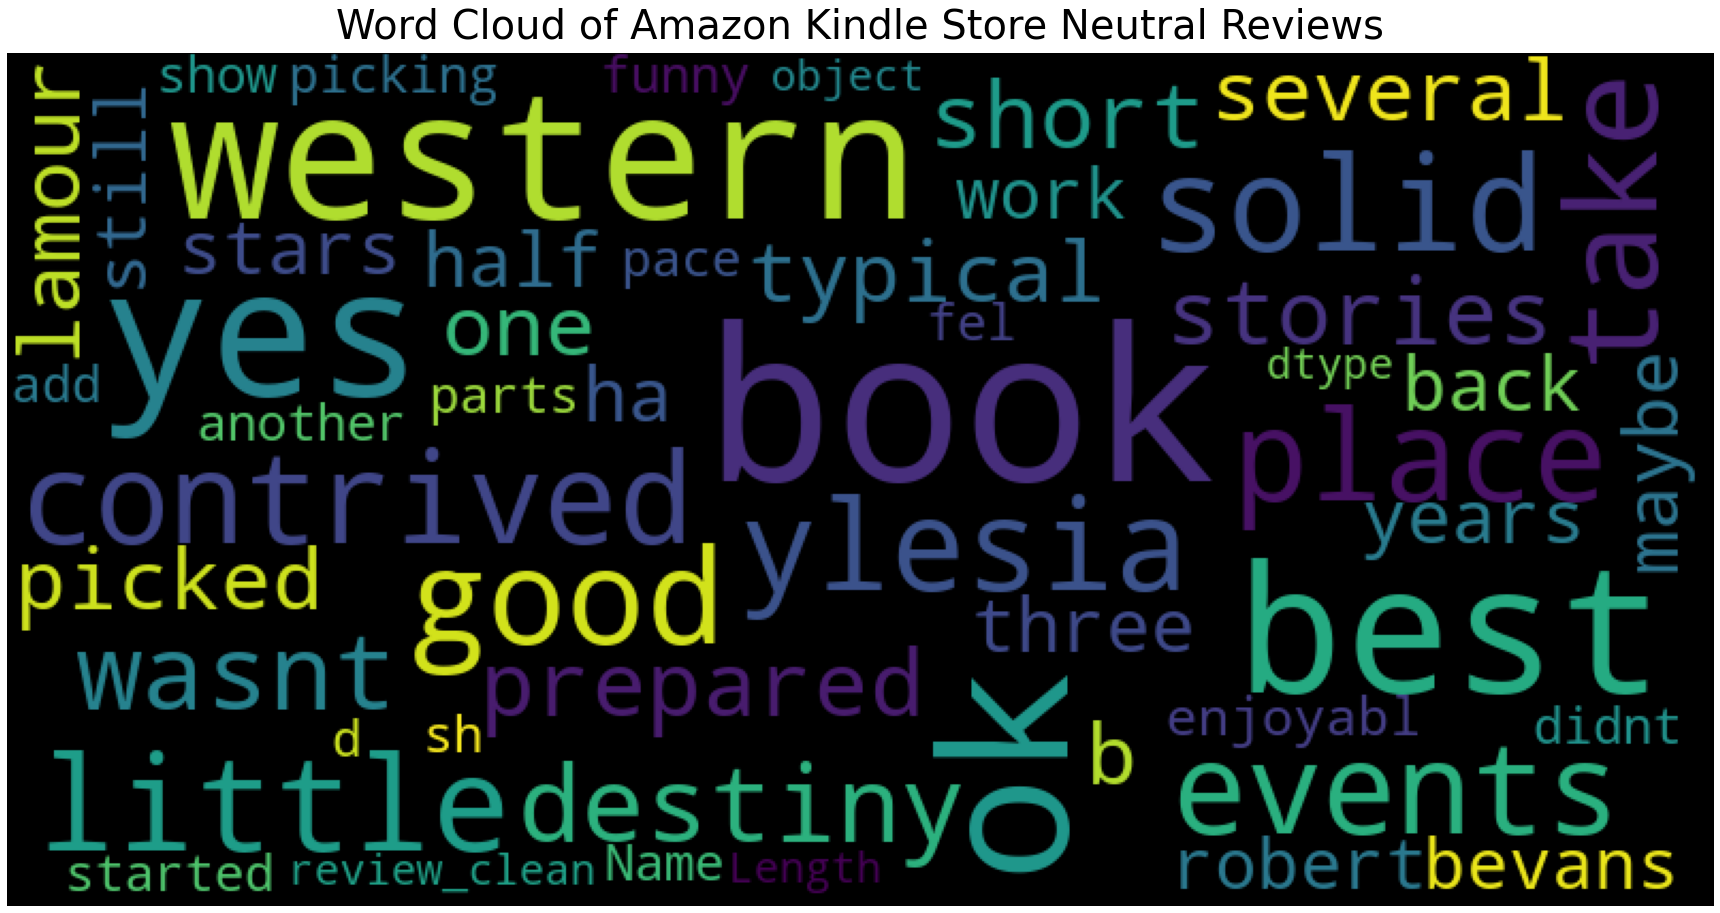

In [90]:
wordcloud.generate(str(df_notr['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Neutral Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

# Another way of frequency counts of words

# Positive sentiment

In [91]:
!pip install nltk --user

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

In [92]:

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ensieh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ensieh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
def word_count(reviews):
    '''This function tokenize and count the words in text'''
    word_num={}
    for i in reviews:
        token = nltk.word_tokenize(i)
        for t in token:
            if t not in word_num.keys():
                word_num[t] = 1
            else:
                word_num[t] += 1  
    return word_num

In [95]:
word_frequency=word_count(df_pos['review_clean'])

In [96]:
df_pos_count = pd.DataFrame(columns=['word', 'count'])
df_pos_count['word'] = word_frequency.keys()
df_pos_count['count'] = list(word_frequency.values())
df_pos_count=df_pos_count.sort_values(by=['count'], ascending=False)
df_pos_count=df_pos_count.reset_index(drop=True)

In [97]:
stop = set(stopwords.words("english"))

In [98]:
df_pos_count['word_without_stop'] = df_pos_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [99]:
df_pos_without_stop = df_pos_count.dropna(subset=['word_without_stop'])

In [100]:
df_top_25_pos = df_pos_count.loc[df_pos_count['word_without_stop']!=''].head(25)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Positive Reviews Common Words'}, xlabel='word', ylabel='count'>

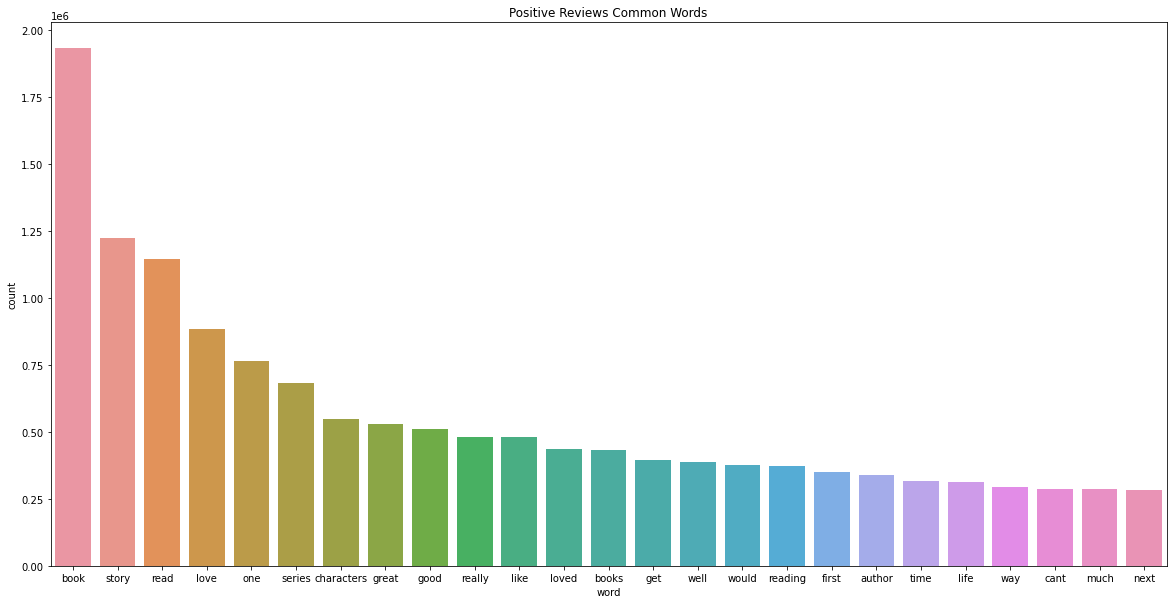

In [101]:
plt.figure(figsize=(20,10))
plt.title('Positive Reviews Common Words')
sns.barplot("word","count", data=df_top_25_pos)

# Negative sentiment

In [102]:
word_frequency_neg=word_count(df_neg['review_clean'])

In [103]:
df_neg_count = pd.DataFrame(columns=['word', 'count'])
df_neg_count['word'] = word_frequency_neg.keys()
df_neg_count['count'] = list(word_frequency_neg.values())
df_neg_count=df_neg_count.sort_values(by=['count'], ascending=False)
df_neg_count=df_neg_count.reset_index(drop=True)

In [104]:
df_neg_count['word_without_stop'] = df_neg_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [105]:
df_neg_without_stop = df_neg_count.dropna(subset=['word_without_stop'])

In [106]:
df_top_25_neg = df_neg_count.loc[df_neg_count['word_without_stop']!=''].head(25)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Negative Reviews Common Words'}, xlabel='word', ylabel='count'>

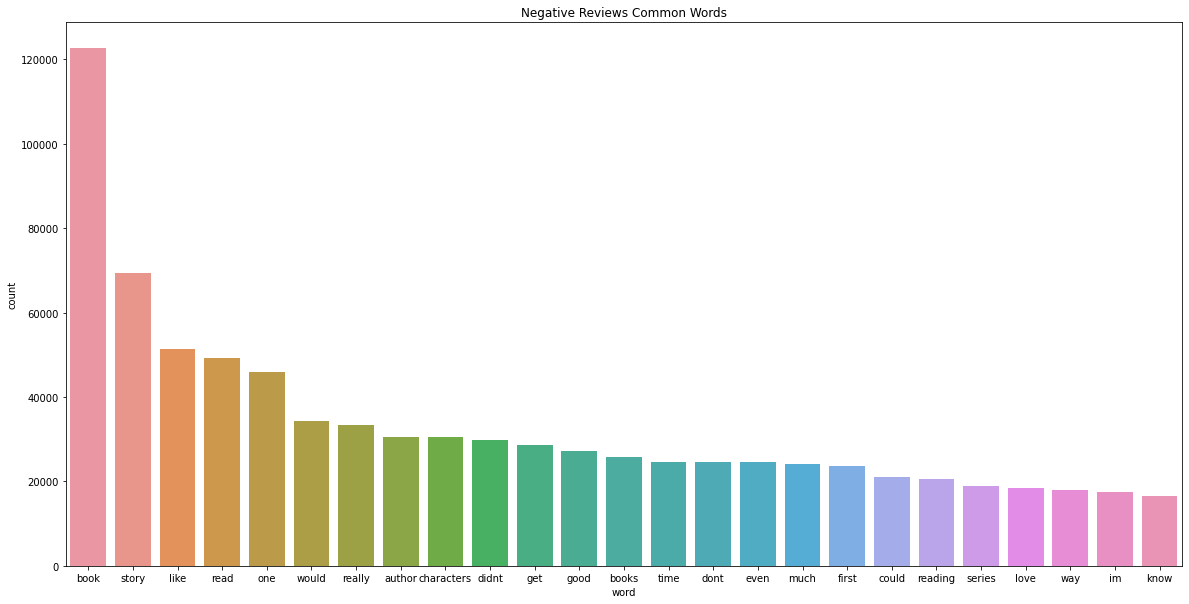

In [107]:
plt.figure(figsize=(20,10))
plt.title('Negative Reviews Common Words')
sns.barplot("word","count", data=df_top_25_neg)

# Neutral sentiment 

In [108]:
word_frequency_notr = word_count(df_notr['review_clean'])

In [109]:
df_nt_count = pd.DataFrame(columns=['word', 'count'])
df_nt_count['word'] = word_frequency_notr.keys()
df_nt_count['count'] = list(word_frequency_notr.values())
df_nt_count=df_nt_count.sort_values(by=['count'], ascending=False)
df_nt_count=df_nt_count.reset_index(drop=True)

In [110]:
df_nt_count['word_without_stop'] = df_nt_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [111]:
df_nt_without_stop = df_nt_count.dropna(subset=['word_without_stop'])

In [112]:
df_top_25_nt = df_nt_count.loc[df_nt_count['word_without_stop']!=''].head(25)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Neutral Reviews Common Words'}, xlabel='word', ylabel='count'>

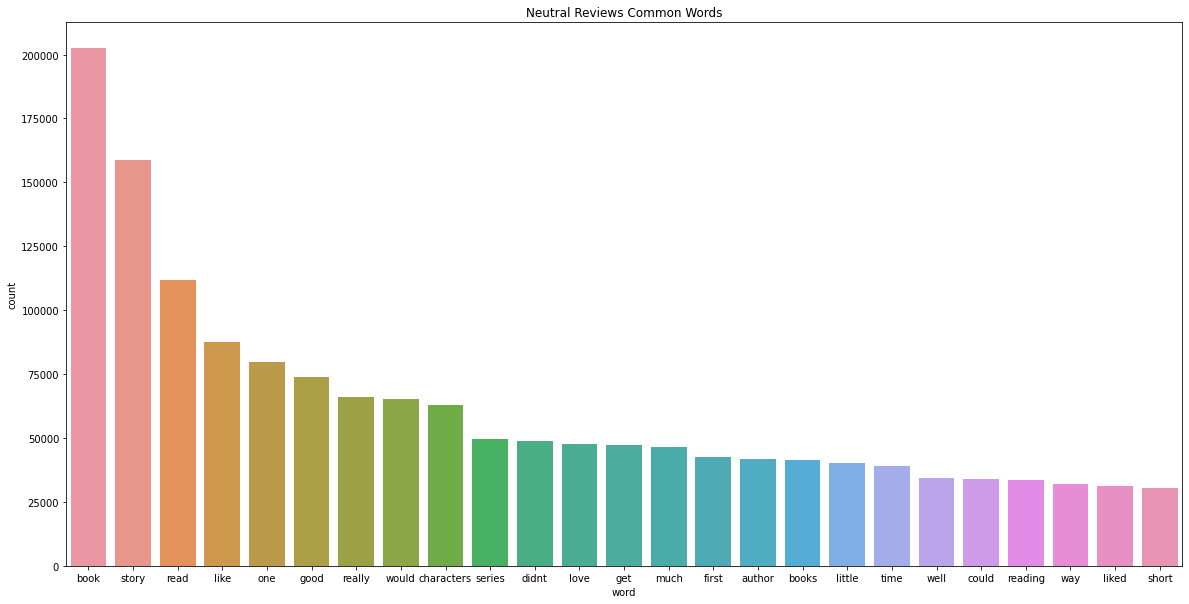

In [113]:
plt.figure(figsize=(20,10))
plt.title('Neutral Reviews Common Words')
sns.barplot("word","count", data=df_top_25_nt)

# Logistic Regression to classify the review text

In [114]:
df['sentiment'].value_counts()

2    1841863
1     189556
0     109546
Name: sentiment, dtype: int64

In [115]:
df_0 = df.loc[df['sentiment']==0].head(50000)

In [116]:
df_1 = df.loc[df['sentiment']==1].head(50000)

In [117]:
df_2 = df.loc[df['sentiment']==2].head(50000)

In [118]:
frames = [df_0, df_1, df_2]
#getting together samples
df_sampled = pd.concat(frames)

In [119]:
df_sampled['sentiment'].value_counts()

0    50000
1    50000
2    50000
Name: sentiment, dtype: int64

In [120]:
def model(df) :
    '''This function splits data to train and test, then vectorized reviews 
        and calculating results from LogReg
    '''
    
    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], 
                                                        df['sentiment'], test_size=0.2, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
        
    # define vectorize and fit to data     
    word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',
        analyzer='word',token_pattern=r'\w{1,}',stop_words='english',
        ngram_range=(1, 1),max_features=10000)

    word_vectorizer.fit(df['review_clean'])
    
    # train - test vectorized features
    train_word_features = word_vectorizer.transform(X_train)
    test_word_features = word_vectorizer.transform(X_test)
     
    # choosing and fitting classifier
    classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
    classifier.fit(train_word_features, y_train)
    
    # calculating results 
    y_pred_train = classifier.predict(train_word_features)
    y_pred = classifier.predict(test_word_features)
          
    print("Accuracy:"); print("="*len("Accuracy:"))
    print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {accuracy_score(y_test, y_pred)}")

    print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
    print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")
    
    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    plt.show()

In [121]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

(120000,)
(30000,)
Accuracy:
TRAIN: 0.734475
TEST: 0.6961333333333334

Balanced Accuracy:
TRAIN: 0.734360382032222
TEST: 0.6966491430723544


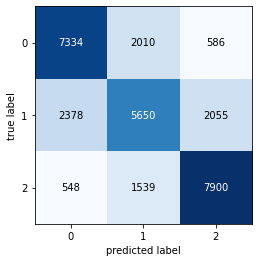

In [122]:
model(df_sampled)

In [123]:
df.to_csv('cleaned_data.csv', index = False)

In [124]:
# dataframe and series 
import pandas as pd
import numpy as np

# sklearn imports for modeling part
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import nltk
from nltk.corpus import stopwords


# Model implementation

In [125]:
# dataframe and series 
import pandas as pd
import numpy as np

# sklearn imports for modeling part
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import nltk
from nltk.corpus import stopwords


In [126]:
df = pd.read_csv('cleaned_data.csv', low_memory=False)

In [127]:
df.head() 

,overall,verified,reviewTime,reviewerID,asin,style,reviewText,summary,title,day,month,year,sentiment,review_clean
0,4,True,2014-07-03,A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},"pretty good story, a little exaggerated, but i...",pretty good story,NaN,3,7,2014,2,pretty good story a little exaggerated but i l...
1,5,True,2014-05-26,A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},"if you've read other max brand westerns, you k...",A very good book,NaN,26,5,2014,2,if youve read other max brand westerns you kno...
2,5,True,2016-09-16,A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},"love max, always a fun twist",Five Stars,NaN,16,9,2016,2,love max always a fun twist
3,5,True,2016-03-03,A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},"as usual for him, a good book",a good,NaN,3,3,2016,2,as usual for him a good book
4,5,True,2015-09-10,AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},mb is one of the original western writers and ...,A Western,NaN,10,9,2015,2,mb is one of the original western writers and ...


In [128]:
df.isna().sum() 

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
style               0
reviewText          0
summary          1716
title           11055
day                 0
month               0
year                0
sentiment           0
review_clean      242
dtype: int64

In [129]:
df.dropna(subset=['review_clean'], inplace=True)

In [130]:
df.isna().sum()

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
style               0
reviewText          0
summary          1716
title           11055
day                 0
month               0
year                0
sentiment           0
review_clean        0
dtype: int64

# Samples from various data

In [131]:
def calc_two_sentiment(overall):
    '''This function encodes the rating 1 and 2 as 0, others as 1'''
    if overall >= 3:
        return 1
    else:
        return 0

In [132]:
df['sentiment'] = df['overall'].apply(calc_two_sentiment)

In [133]:
df['sentiment'].value_counts()

1    2031195
0     109528
Name: sentiment, dtype: int64

In [134]:
df_0 = df.loc[df['sentiment']==0].head(50000)

In [135]:
df_1 = df.loc[df['sentiment']==1].head(50000)

In [136]:
frames = [df_0, df_1]
#getting together samples
df_sampled = pd.concat(frames)

In [137]:
df_sampled['sentiment'].value_counts()

0    50000
1    50000
Name: sentiment, dtype: int64

# Functions for model 

In [138]:
def model_split(df) :
    '''This function splits data to train and test, then vectorized reviews '''
    
    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], 
                                                        df['sentiment'], test_size=0.2, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
        
    # define vectorize and fit to data     
    word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',
        analyzer='word',token_pattern=r'\w{1,}',stop_words='english',
        ngram_range=(1, 1),max_features=10000)

    word_vectorizer.fit(df['review_clean'])
    
    # train - test vectorized features - tranforming to suitable format for modeling
    train_word_features = word_vectorizer.transform(X_train) 
    test_word_features = word_vectorizer.transform(X_test)
    
    return train_word_features , test_word_features, y_train, y_test 

def model(df,classifier):
    '''this function gives modeling results and confusion matrix also'''
    train_word_features,test_word_features,y_train,y_test = model_split(df)
    classifier.fit(train_word_features, y_train)
    
    # calculating results 
    y_pred_train = classifier.predict(train_word_features)
    y_pred = classifier.predict(test_word_features)
    
    #for smart printing (learned from our lead instructor Bryan Arnold)
    print("Accuracy:"); print("="*len("Accuracy:"))
    print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {accuracy_score(y_test, y_pred)}")

    print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
    print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")
    
    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    plt.show()

(80000,)
(20000,)
Accuracy:
TRAIN: 0.8825
TEST: 0.87025

Balanced Accuracy:
TRAIN: 0.8825057287934486
TEST: 0.8702086850563919


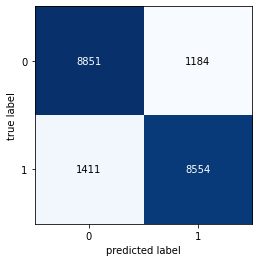

In [139]:
classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
model(df_sampled,classifier)

# roc auc with crossval score

In [140]:
# vectorize data for calculation
word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',
        analyzer='word',token_pattern=r'\w{1,}',stop_words='english',
        ngram_range=(1, 1),max_features=10000)

word_vectorizer.fit(df_sampled['review_clean'])
    
word_features = word_vectorizer.transform(df_sampled['review_clean'])

scores = cross_val_score(classifier, word_features, df_sampled['sentiment'], cv=3, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.9279297286778666 +/- 0.007239625635762912


# Decision Tree 

(80000,)
(20000,)
Accuracy:
TRAIN: 0.631475
TEST: 0.6291

Balanced Accuracy:
TRAIN: 0.63172354616334
TEST: 0.6281000442255418


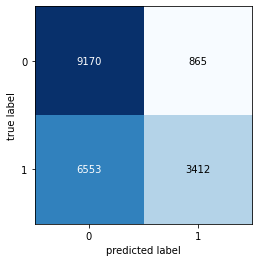

In [141]:
des_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5, 
                                        random_state=42, class_weight='balanced')
model(df_sampled,des_tree)

# Random Forest

(80000,)
(20000,)
Accuracy:
TRAIN: 0.994275
TEST: 0.85215

Balanced Accuracy:
TRAIN: 0.9942760674926141
TEST: 0.852100413230062


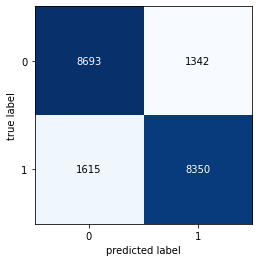

In [142]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,class_weight='balanced',
                            criterion = 'entropy',max_features = 'sqrt',min_samples_split = 5)
model(df_sampled,rf)

In [143]:
# to keep results and see in dataframe
df_results = pd.DataFrame(columns=["Model", 'train_balanced', 'test_balanced']) # to 

In [144]:
df_results = df_results.append({       # writing results to df
     "Model": 'Logreg' ,
               'train_balanced' : 0.88,
                    'test_balanced' : 0.87}, ignore_index=True)
df_results = df_results.append({       # writing results to df
     "Model": 'Decision Tree' ,
               'train_balanced' : 0.63,
                    'test_balanced' : 0.63}, ignore_index=True)
df_results = df_results.append({       # writing results to df
     "Model": 'Random Forest' ,
               'train_balanced' : 0.99,
                    'test_balanced' : 0.85}, ignore_index=True)



/tmp/ipykernel_14384/1483595180.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({       # writing results to df
/tmp/ipykernel_14384/1483595180.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({       # writing results to df
/tmp/ipykernel_14384/1483595180.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({       # writing results to df


In [145]:
df_results

,Model,train_balanced,test_balanced
0,Logreg,0.88,0.87
1,Decision Tree,0.63,0.63
2,Random Forest,0.99,0.85


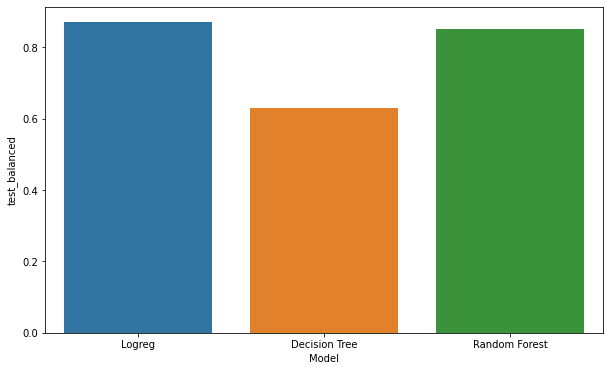

In [146]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Model', y= 'test_balanced',data=df_results)

# Book recommendation system

In [1]:
# dataframe and series 
import pandas as pd
import numpy as np
import scipy
import math

# sklearn imports 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics.pairwise as pw
from sklearn.metrics.pairwise import pairwise_distances

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import random
from scipy import sparse
from scipy.stats import pearsonr
import re

In [2]:
df = pd.read_csv('cleaned_data.csv') # taking whole data


# Choose 1000 users - 1000 books

In [3]:
# creting new column which consists of reviewer numbers of user
df['Reviewer_Count'] = df['reviewerID'].map(df['reviewerID'].value_counts())

In [4]:
# creating new column for review numbers of books
df['Book_Count'] = df['asin'].map(df['asin'].value_counts())

In [5]:
df = df.sort_values(by=['Reviewer_Count'],ascending=False)

In [6]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewText,summary,title,day,month,year,sentiment,review_clean,Reviewer_Count,Book_Count
482903,5,False,2014-03-10,A1JLU5H1CCENWX,B00GW3XNE4,{'Format:': ' Kindle Edition'},i loved mandy and i loved how she grew some la...,Blake,Between Lonesome and Texas (Lone Star Cowboys ...,10,3,2014,2,i loved mandy and i loved how she grew some la...,1366,28
1061602,5,False,2015-12-15,A1JLU5H1CCENWX,B00WRFUEJI,{'Format:': ' Kindle Edition'},"jax has a way with words, ""he mutters somethin...",Jax,Hard to Forget: An Alpha&#39;s Heart Novel (Al...,15,12,2015,2,jax has a way with words he mutters something ...,1366,115
1471301,5,False,2016-03-28,A1JLU5H1CCENWX,B01DJI001S,{'Format:': ' Kindle Edition'},"the prince sure is an arrogant man, people in ...",Kristoff,His Princess (A Royal Romance) - Kindle edition,28,3,2016,2,the prince sure is an arrogant man people in m...,1366,277
468340,5,False,2013-12-23,A1JLU5H1CCENWX,B00GK4V9PA,{'Format:': ' Kindle Edition'},ashton she knows how to get a response out of ...,Dane,A Long Goodbye (Southern Comfort Book 1) - Kin...,23,12,2013,2,ashton she knows how to get a response out of ...,1366,55
819030,5,True,2013-05-15,A1JLU5H1CCENWX,B00OAGWXDW,{'Format:': ' Kindle Edition'},"jaxon you sly dog you (winks) ""i sure as hell ...",Jaxon,Beautiful Broken Rules eBook,15,5,2013,2,jaxon you sly dog you winks i sure as hell wil...,1366,425


In [7]:
df.reset_index(drop=True,inplace=True) 

In [8]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewText,summary,title,day,month,year,sentiment,review_clean,Reviewer_Count,Book_Count
0,5,False,2014-03-10,A1JLU5H1CCENWX,B00GW3XNE4,{'Format:': ' Kindle Edition'},i loved mandy and i loved how she grew some la...,Blake,Between Lonesome and Texas (Lone Star Cowboys ...,10,3,2014,2,i loved mandy and i loved how she grew some la...,1366,28
1,5,False,2015-12-15,A1JLU5H1CCENWX,B00WRFUEJI,{'Format:': ' Kindle Edition'},"jax has a way with words, ""he mutters somethin...",Jax,Hard to Forget: An Alpha&#39;s Heart Novel (Al...,15,12,2015,2,jax has a way with words he mutters something ...,1366,115
2,5,False,2016-03-28,A1JLU5H1CCENWX,B01DJI001S,{'Format:': ' Kindle Edition'},"the prince sure is an arrogant man, people in ...",Kristoff,His Princess (A Royal Romance) - Kindle edition,28,3,2016,2,the prince sure is an arrogant man people in m...,1366,277
3,5,False,2013-12-23,A1JLU5H1CCENWX,B00GK4V9PA,{'Format:': ' Kindle Edition'},ashton she knows how to get a response out of ...,Dane,A Long Goodbye (Southern Comfort Book 1) - Kin...,23,12,2013,2,ashton she knows how to get a response out of ...,1366,55
4,5,True,2013-05-15,A1JLU5H1CCENWX,B00OAGWXDW,{'Format:': ' Kindle Edition'},"jaxon you sly dog you (winks) ""i sure as hell ...",Jaxon,Beautiful Broken Rules eBook,15,5,2013,2,jaxon you sly dog you winks i sure as hell wil...,1366,425


In [9]:
df.isna().sum() # to check title column

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
style                 0
reviewText            0
summary            1716
title             11055
day                   0
month                 0
year                  0
sentiment             0
review_clean        242
Reviewer_Count        0
Book_Count            0
dtype: int64

In [10]:
df.dropna(subset=['title'], inplace=True) # dropping without title columns


# Taking Samples

In [11]:
df_100 = df.loc[df['Reviewer_Count']>150] 

In [12]:
df_1000 = df_100.loc[df_100['Book_Count']>150]

In [13]:
df_1000['reviewerID'].nunique()

1096

In [14]:
df_1000['asin'].nunique()

1135

In [15]:
df_200=df.loc[df['Reviewer_Count']>100]

In [16]:
df_2000 = df_200.loc[df_200['Book_Count']>100]

In [17]:
df_1000.to_csv('df_1000.csv',index = False)

In [18]:
df_2000.to_csv('df_2000.csv',index = False) 

# Taking pivot table of user item

In [19]:
pivot = pd.pivot_table(df_1000, index='reviewerID', columns=['asin'], values='overall').fillna(0)

pivot.head(5)

asin,B003FL6X52,B003JTHMO6,B003P2QCE8,B003XVYJ2S,B0043GX2FW,B00457VKIA,B004A8ZT9A,B004AYDJM8,B004C44556,B004D9FGD0,...,B01GZ7IMJC,B01H0UI0QS,B01H4NVSOC,B01H5MF0JG,B01H62L5GW,B01H8JWYIQ,B01H941TYK,B01HDF9IKM,B01HDNEFGQ,B01HF6OU70
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0020356UF96ZV361ST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00463782V7TKAP9EMNL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0099735VDZ3HDCAAYKL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A103KWX1QFCG6I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A103M7E0BSFC83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# changing pivot table to matrix
pivot_mat = pivot.values

pivot_mat[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
reviewer_id = list(pivot.index)
reviewer_id[:10]

['A0020356UF96ZV361ST',
 'A00463782V7TKAP9EMNL',
 'A0099735VDZ3HDCAAYKL',
 'A103KWX1QFCG6I',
 'A103M7E0BSFC83',
 'A1098Z3D7ENJ2F',
 'A10DX94ATZQEFG',
 'A10ED33F8VY4GU',
 'A10JAUCIGVRW9F',
 'A10PEXB6XAQ5XF']

In [22]:
# Sparcing pivot matrix 
sparse_matrix = csr_matrix(pivot_mat)

sparse_matrix

<1096x1135 sparse matrix of type '<class 'numpy.float64'>'
	with 26988 stored elements in Compressed Sparse Row format>

In [23]:
# factor numbers of the user-item matrix

factor_n = 15

# matrix factorization of the user-item matrix

U, sigma, V = svds(sparse_matrix, k = factor_n) #defining elements of the factorization

In [24]:
# to see and check the dimensions of matrix
print(U.shape)
print(V.shape)
sigma = np.diag(sigma)
print(sigma.shape)


(1096, 15)
(15, 1135)
(15, 15)


In [25]:
# dot product of matrix
pred_rating = np.dot(np.dot(U,sigma),V)

pred_rating[:5]

array([[ 1.10239408e-03,  1.34736759e-02, -5.86820635e-05, ...,
        -2.68693144e-02, -2.01760244e-02, -4.75279090e-02],
       [ 3.34235072e-03,  4.03884159e-03, -1.15664696e-05, ...,
        -1.37850662e-03, -2.61606703e-03, -1.18982518e-03],
       [ 9.22264322e-02, -5.63993179e-02,  2.54544712e-04, ...,
         1.00024480e-01,  7.52609550e-02, -4.05629957e-01],
       [ 5.35298052e-02, -1.75656540e-02,  1.52259135e-04, ...,
         5.15084647e-02,  1.08079432e-01,  5.16179317e-02],
       [-2.81642346e-03,  6.93704762e-02,  4.88292424e-04, ...,
         2.53128868e-02, -1.04887572e-02, -6.69418895e-02]])

In [26]:
# normalizing matrix
pred_rating_n = (pred_rating - pred_rating.min()) / (pred_rating.max() - pred_rating.min())

In [27]:
pred_rating_n[:5]


array([[0.24079927, 0.24213786, 0.24067364, ..., 0.23777268, 0.2384969 ,
        0.23553738],
       [0.24104164, 0.241117  , 0.24067874, ..., 0.24053083, 0.24039692,
        0.24055125],
       [0.25065906, 0.23457747, 0.24070753, ..., 0.25150282, 0.24882336,
        0.19679006],
       [0.24647201, 0.23877935, 0.24069646, ..., 0.2462533 , 0.25237438,
        0.24626514],
       [0.24037524, 0.248186  , 0.24073282, ..., 0.24341889, 0.23954508,
        0.23343675]])

In [28]:
# Assigning reconstructed matrix to df
pred_df = pd.DataFrame(pred_rating_n, columns = pivot.columns, index=reviewer_id).transpose()
pred_df.head(10)

,A0020356UF96ZV361ST,A00463782V7TKAP9EMNL,A0099735VDZ3HDCAAYKL,A103KWX1QFCG6I,A103M7E0BSFC83,A1098Z3D7ENJ2F,A10DX94ATZQEFG,A10ED33F8VY4GU,A10JAUCIGVRW9F,A10PEXB6XAQ5XF,...,AYGI3FN2M078F,AYIPGMUURK82V,AYJGHZSEI1J2N,AYRW797B5QB24,AYUTCGVSM1H7T,AYVJY4Z9CYQWU,AZGDIB6UL3QNL,AZMMFZKJB8PV6,AZPNSCZH6LW40,AZYERRDY2VW61
asin,,,,,,,,,,,,,,,,,,,,,
B003FL6X52,0.240799,0.241042,0.250659,0.246472,0.240375,0.244386,0.256805,0.241119,0.237331,0.240843,...,0.241188,0.244759,0.242135,0.240797,0.240597,0.235845,0.251465,0.256306,0.264066,0.242806
B003JTHMO6,0.242138,0.241117,0.234577,0.238779,0.248186,0.248473,0.250640,0.240808,0.290505,0.241533,...,0.236527,0.239235,0.238672,0.265487,0.255619,0.297689,0.230879,0.254304,0.238716,0.294821
B003P2QCE8,0.240674,0.240679,0.240708,0.240696,0.240733,0.240524,0.240557,0.240682,0.240721,0.240690,...,0.240691,0.240706,0.240689,0.240526,0.240735,0.240839,0.240711,0.240667,0.240668,0.240823
B003XVYJ2S,0.240838,0.240793,0.243314,0.241905,0.241051,0.240434,0.240376,0.240622,0.245160,0.240745,...,0.239334,0.241091,0.240934,0.248624,0.241810,0.244430,0.239387,0.242860,0.240551,0.244057
B0043GX2FW,0.238430,0.241080,0.237616,0.256524,0.249887,0.296174,0.274402,0.240693,0.239293,0.241752,...,0.241513,0.254929,0.244198,0.215366,0.248400,0.251265,0.221327,0.263694,0.245109,0.284484
B00457VKIA,0.239124,0.240432,0.238062,0.232225,0.262187,0.248439,0.215176,0.240887,0.291402,0.243333,...,0.244099,0.238393,0.241384,0.233976,0.267319,0.319491,0.243789,0.233979,0.232540,0.329024
B004A8ZT9A,0.241141,0.241266,0.253746,0.245552,0.243063,0.233438,0.252045,0.241236,0.254441,0.241636,...,0.242474,0.240652,0.241347,0.239516,0.245681,0.261061,0.225472,0.273758,0.258340,0.263967
B004AYDJM8,0.241149,0.241653,0.241649,0.249039,0.239313,0.252623,0.285258,0.241136,0.250817,0.240840,...,0.240133,0.242867,0.240935,0.256204,0.241962,0.243984,0.228527,0.289116,0.265918,0.256198
B004C44556,0.240929,0.240733,0.240513,0.242067,0.243619,0.236849,0.238628,0.240787,0.250515,0.241224,...,0.239697,0.241841,0.240512,0.235558,0.244793,0.257842,0.239929,0.243843,0.239411,0.254953


In [43]:
def recommend_items(user_id ,pred_df, items_df, items_to_ignore=[], top_list=20, verbose=False):
        '''this function find the most related items'''
        # taking and sorting the user's predictions
        sorted_user_predictions = pred_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'recStrength'})
        print(sorted_user_predictions)

        recommendations_df = sorted_user_predictions[~sorted_user_predictions['asin'].isin(items_to_ignore)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(top_list)
#         print(recommendations_df)

        return recommendations_df

In [40]:
df_meta = pd.read_csv('kindle_meta_last.csv', low_memory=False) #getting metadata for title names


In [44]:
def recommender(user_id,pred_df,real_df,df_meta):
    '''this functions merges the title with corresponding book id and finding the 
        empty rows which means does not read by user and priting results'''
        
    recommend = recommend_items(user_id, pred_df,real_df)
    df_user= real_df.loc[real_df['reviewerID'] == user_id]
    new_df = df_user.merge(recommend, how = 'outer', left_on = 'asin', right_on = 'asin')
    rec_df = new_df.loc[new_df['overall'].isnull()==True]
    df_rec_t = rec_df.loc[:, ['asin', 'recStrength']]
    df_last = pd.merge(df_rec_t,df_meta[['title','asin']],on=['asin'], how='left') 
    return df_last

# Getting Recommendations


In [45]:
recommender('A0099735VDZ3HDCAAYKL',pred_df,df_1000,df_meta)


            asin  recStrength
0     B00ZAJTPB6     0.520272
1     B013FJACFU     0.511057
2     B011T78JT6     0.505336
3     B011TI8CTW     0.502552
4     B017AJ4QFI     0.473874
...          ...          ...
1130  B01BZB7RXA     0.171514
1131  B01EIPX54U     0.162672
1132  B017WTF8TE     0.162640
1133  B01B0QXBA8     0.157391
1134  B01H941TYK     0.149383

[1135 rows x 2 columns]


,asin,recStrength,title
0,B017AJ4QFI,0.473874,A Very Alpha Christmas: Over 25 Paranormal Hol...
1,B0135MRXRM,0.473195,Sleeping BBW And The Billionaire Bear (The Shi...
2,B013L4T8Y0,0.473124,Three Grizzlies Gruff (Bear-y Spicy Fairy Tale...
3,B010TYBN4S,0.461972,Wanting a Mate (BBW Paranormal Shapeshifter Ro...
4,B010ZFRUQQ,0.454028,Goldilocks And The Three Bear Shifters (Bear-y...
5,B014B6KG2K,0.451822,Rumpled Bear Skin (Seattle&#39;s Billionaire B...
6,B01CSNZ15K,0.438699,Chief Bear (Rescue Bears Book 1) - Kindle edition
7,B013X96TL8,0.437376,Rapunzel And The Billionaire Bear (The Shifter...
8,B00UGP39S4,0.430844,Furbidden: BBW Paranormal Shape Shifter Romanc...
9,B0130LQWBG,0.426664,Hunting a Mate (BBW Paranormal Shapeshifter Ro...


# Another Technique - User Based Recommender


In [33]:
user_sparse_pivot = sparse.csr_matrix(pivot.fillna(0))
user_recommender = pw.cosine_similarity(user_sparse_pivot)

In [34]:
pred_rating_n_cos = (user_recommender - user_recommender.mean())/ (user_recommender.max() - user_recommender.min())


In [35]:
user_recommender_df = pd.DataFrame(pred_rating_n_cos, columns=pivot.index.values,index = pivot.index.values)


In [36]:
user_recommender_df.head(3)


,A0020356UF96ZV361ST,A00463782V7TKAP9EMNL,A0099735VDZ3HDCAAYKL,A103KWX1QFCG6I,A103M7E0BSFC83,A1098Z3D7ENJ2F,A10DX94ATZQEFG,A10ED33F8VY4GU,A10JAUCIGVRW9F,A10PEXB6XAQ5XF,...,AYGI3FN2M078F,AYIPGMUURK82V,AYJGHZSEI1J2N,AYRW797B5QB24,AYUTCGVSM1H7T,AYVJY4Z9CYQWU,AZGDIB6UL3QNL,AZMMFZKJB8PV6,AZPNSCZH6LW40,AZYERRDY2VW61
A0020356UF96ZV361ST,0.972044,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,...,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956
A00463782V7TKAP9EMNL,-0.027956,0.972044,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,...,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956
A0099735VDZ3HDCAAYKL,-0.027956,-0.027956,0.972044,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,...,0.026712,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,-0.027956,0.074784,-0.027956


In [37]:
def recommend2(user_recommender_df,user_id,df_meta):
    '''This function finds the top-2 similar users first,
    then it takes the mean of their ratings to books and sorted books according to mean values of books
    '''
    user_cosine_df = pd.DataFrame(user_recommender_df[user_id].sort_values(ascending=False))
    user_cosine_df.reset_index(level=0, inplace=True)
    user_cosine_df.columns = ['asin','cosine_sim']
    
    # for 2-similar users
    similar_user = list(user_cosine_df['asin'][1:3].values)
    similar_user_df = pivot.T[[user_id] + similar_user]
    similar_user_df['mean'] = similar_user_df[similar_user].mean(numeric_only=True,axis=1)
    similar_user_df.sort_values('mean', ascending=False,inplace = True)
    
    #taking top 10 books from similar users and merging them
    book_top10 = similar_user_df[similar_user_df[user_id]==0].head(10)
    df_last1 = pd.merge(book_top10,df_meta[['title','asin']],on=['asin'], how='left') 
    return df_last1


In [38]:
recommend2(user_recommender_df,'A0099735VDZ3HDCAAYKL',df_meta)


,asin,A0099735VDZ3HDCAAYKL,A1BOINGLPB5I1M,A1V0IK7DUYIVAC,mean,title
0,B00LNJ4ABC,0.0,5.0,5.0,5.0,Kodiak&#39;s Claim (Kodiak Point Book 1) - Kin...
1,B00YQ3UDM2,0.0,5.0,5.0,5.0,Double Dragons: BBW Paranormal Romance (Dragon...
2,B00QL65B2Y,0.0,5.0,5.0,5.0,Separation Zone (Immortal Ops Book 7) - Kindle...
3,B015BRVKQO,0.0,5.0,5.0,5.0,Moon&#39;s Law (New Moon Wolves 2) - Kindle ed...
4,B0165SOAPG,0.0,5.0,5.0,5.0,Jace (Riverwise Private Security 2) - Wolf Shi...
5,B00F9Z458E,0.0,0.0,5.0,2.5,The Draglen Brothers - DRAKEN (BK 1) - Kindle ...
6,B01DGXSHRK,0.0,5.0,0.0,2.5,Barbarian&#39;s Mate
7,B00JZWDC9K,0.0,0.0,5.0,2.5,King of Prey: (A Bird Shifter Novel) - Kindle ...
8,B00PD8LQ6G,0.0,5.0,0.0,2.5,Ready to Were: Shift Happens Series Book One -...
9,B015WOU89Q,0.0,5.0,0.0,2.5,Wild Bear (Bear Haven Book 3) - Kindle edition
